### Notebook for analysis of FL and OD data for LEMOS experiments

In [1]:
## import here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
#from scipy.integrate import cumtrapz

In [2]:
## import the datafiles 

FL_data = pd.read_csv('fl.csv')
OD_data = pd.read_csv('od.csv')
N_size = len(FL_data)
N_replicates = 3

# Replace 'OVERFLW' with 100000 in all columns of FL_data and OD_data
FL_data.replace("OVRFLW", int(100000), inplace = True)
OD_data.replace("OVRFLW", int(1), inplace = True)

FL_data = FL_data.apply(pd.to_numeric, errors='coerce')
# print(FL_data.dtypes)

In [3]:
## Process the data files 
# define what samples are in what well
neg_wells = ['H11']
green_constant = ['B9', 'C9', 'D9']
red_constant = ['E9', 'F9', 'G9']
set_point_2_PI = ['B11',  'C11', 'D11']
set_point_1_PI = ['E11', 'F11', 'G11']

blank = ['A9']
st_pt_1 = 11500
st_pt_2 = 18500


## Sort the OD data

#blank_OD = OD_data[blank[0]].to_numpy()[0]*1 
# blank_OD = 0.13
blank_OD_array = 0.105 * np.ones(16) # replace this line with the array in the python code
# blank_OD_array = np.array([0.118, 0.145, 0.145, 0.145, 0.122, 0.182, 0.197, 0.145, 0.145, 0.155, 0.190, 
# 0.200, 0.138, 0.128, 0.134, 0.000])
blank_neg_wells = [blank_OD_array[0]]
blank_set_point_2_PI  = blank_OD_array[[1, 2, 3]]
blank_set_point_1_PI  = blank_OD_array[[4, 5, 6]]
blank_set_point_2 = blank_OD_array[[14, 13, 12]]
blank_set_point_1 = blank_OD_array[[11, 10, 9]]
blank_green_constant = blank_OD_array[[14, 13, 12]]
blank_red_constant = blank_OD_array[[11, 10, 9]]


neg_ctrl_OD = np.zeros((len(neg_wells),N_size))
for i in range(len(neg_wells)):
    neg_ctrl_OD[i,:] = OD_data[neg_wells[i]].to_numpy() - blank_neg_wells[i]

green_constant_OD = np.zeros((len(green_constant),N_size))
for i in range(len(green_constant)):
    green_constant_OD[i,:] = OD_data[green_constant[i]].to_numpy() - blank_green_constant[i]

red_constant_OD = np.zeros((len(red_constant),N_size))
for i in range(len(red_constant)):
    red_constant_OD[i,:] = OD_data[red_constant[i]].to_numpy() - blank_red_constant[i]

set_point_1_PI_OD = np.zeros((len(set_point_1_PI),N_size))
for i in range(len(set_point_1_PI)):
    set_point_1_PI_OD[i,:] = OD_data[set_point_1_PI[i]].to_numpy() - blank_set_point_1[i]

set_point_2_PI_OD = np.zeros((len(set_point_2_PI),N_size))
for i in range(len(set_point_2_PI)):
    set_point_2_PI_OD[i,:] = OD_data[set_point_2_PI[i]].to_numpy() - blank_set_point_2[i]

## Sort FL data

## Sort the OD data

blank_FL = FL_data[blank[0]].to_numpy()[0] 

neg_ctrl_FL = np.zeros((len(neg_wells),N_size))
for i in range(len(neg_wells)):
    neg_ctrl_FL[i,:] = FL_data[neg_wells[i]].to_numpy() - blank_FL

green_constant_FL = np.zeros((len(green_constant),N_size))
for i in range(len(green_constant)):
    green_constant_FL[i,:] = FL_data[green_constant[i]].to_numpy() - blank_FL

red_constant_FL = np.zeros((len(red_constant),N_size))
for i in range(len(red_constant)):
    red_constant_FL[i,:] = FL_data[red_constant[i]].to_numpy() - blank_FL

set_point_1_PI_FL = np.zeros((len(set_point_1_PI),N_size))
for i in range(len(set_point_1_PI)):
    set_point_1_PI_FL[i,:] = FL_data[set_point_1_PI[i]].to_numpy() - blank_FL

set_point_2_PI_FL = np.zeros((len(set_point_2_PI),N_size))
for i in range(len(set_point_2_PI)):
    set_point_2_PI_FL[i,:] = FL_data[set_point_2_PI[i]].to_numpy() - blank_FL

In [4]:
## Estimate the FL/OD

# Estimate the neg-control FL/OD 

neg_ctrl_FL_by_OD = np.zeros((len(neg_wells),N_size))
for i in range(len(neg_wells)):
    neg_ctrl_FL_by_OD[i,:] = neg_ctrl_FL[i, :]/neg_ctrl_OD[i, :]

neg_ctrl_FL_by_OD_avg = np.mean(neg_ctrl_FL_by_OD, axis = 0)

green_constant_FL_by_OD = np.zeros((len(green_constant),N_size))
for i in range(len(green_constant)):
    green_constant_FL_by_OD[i,:] = green_constant_FL[i, :]/green_constant_OD[i, :] - neg_ctrl_FL_by_OD_avg

red_constant_FL_by_OD = np.zeros((len(red_constant),N_size))
for i in range(len(red_constant)):
    red_constant_FL_by_OD[i,:] = red_constant_FL[i, :]/red_constant_OD[i, :] - neg_ctrl_FL_by_OD_avg

set_point_1_PI_FL_by_OD = np.zeros((len(set_point_1_PI),N_size))
for i in range(len(set_point_1_PI)):
    set_point_1_PI_FL_by_OD[i,:] = set_point_1_PI_FL[i, :]/set_point_1_PI_OD[i, :] - neg_ctrl_FL_by_OD_avg

set_point_2_PI_FL_by_OD = np.zeros((len(set_point_2_PI),N_size))
for i in range(len(set_point_2_PI)):
    set_point_2_PI_FL_by_OD[i,:] = set_point_2_PI_FL[i, :]/set_point_2_PI_OD[i, :] - neg_ctrl_FL_by_OD_avg

### Plot the Data:

In [5]:
# define the time vector

interval = 10 # min
time = range(interval, (N_size + 1) * interval, interval)
xlimit = 16*60

# define color dictionary 

color_dict = {'neg_ctrl':'k', 'green_constant':'g', 'red_constant':'r', 
              'set_point_1_PI':'#6759d4', 'set_point_2_PI':'#ebab4b'}

(0.0, 960.0)

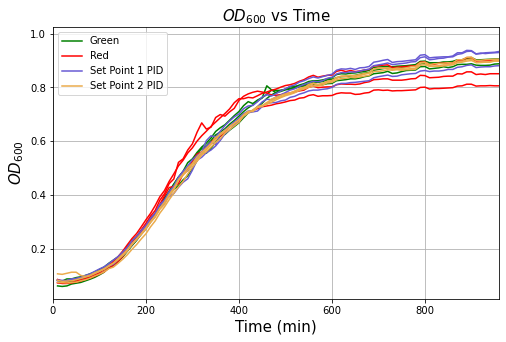

In [6]:
fig, ax = plt.subplots(1,1, figsize = (8,5))

size = 5


# for i in range(len(neg_wells)):
#     # Add label only for the first replicate
#     if i == 0:
#         ax.plot(time, neg_ctrl_OD[i, :], '--', color = color_dict['neg_ctrl'], label = 'Negative Control')#, s = size)
#     else:
#         ax.plot(time, neg_ctrl_OD[i, :], '--', color=color_dict['neg_ctrl'])#, s = size)

for i in range(len(green_constant)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, green_constant_OD[i, :], color = color_dict['green_constant'], label = 'Green')#, s = size)

    else:
        ax.plot(time, green_constant_OD[i, :], color = color_dict['green_constant'])#, s = size)

for i in range(len(red_constant)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, red_constant_OD[i, :], color = color_dict['red_constant'], label = 'Red')#, s = size)

    else:
        ax.plot(time, red_constant_OD[i, :], color = color_dict['red_constant'])#, s = size)

for i in range(len(set_point_1_PI)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, set_point_1_PI_OD[i, :], color = color_dict['set_point_1_PI'], label = 'Set Point 1 PID')#, s = size)

    else:
        ax.plot(time, set_point_1_PI_OD[i, :], color = color_dict['set_point_1_PI'])#, s = size)

for i in range(len(set_point_2_PI)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, set_point_2_PI_OD[i, :], color = color_dict['set_point_2_PI'], label = 'Set Point 2 PID')#, s = size)

    else:
        ax.plot(time, set_point_2_PI_OD[i, :], color = color_dict['set_point_2_PI'])#, s = size)

ax.legend()
ax.grid(True)
ft = 15
ax.set_ylabel(r'$OD_{600}$', fontsize = ft)
ax.set_xlabel('Time (min)', fontsize = ft)
ax.set_title('$OD_{600}$ vs Time', fontsize = ft)
ax.set_xlim((0, xlimit))

(0.0, 960.0)

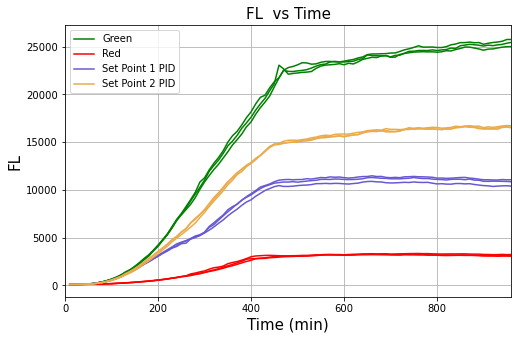

In [7]:
fig, ax = plt.subplots(1,1, figsize = (8,5))

size = 5

# for i in range(len(neg_wells)):
#     # Add label only for the first replicate
#     if i == 0:
#         ax.plot(time, neg_ctrl_FL[i, :], '--', color = color_dict['neg_ctrl'], label = 'Negative Control')#, s = size)
#     else:
#         ax.plot(time, neg_ctrl_FL[i, :], '--', color=color_dict['neg_ctrl'])#, s = size)

for i in range(len(green_constant)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, green_constant_FL[i, :], color = color_dict['green_constant'], label = 'Green')#, s = size)

    else:
        ax.plot(time, green_constant_FL[i, :], color = color_dict['green_constant'])#, s = size)

for i in range(len(red_constant)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, red_constant_FL[i, :], color = color_dict['red_constant'], label = 'Red')#, s = size)

    else:
        ax.plot(time, red_constant_FL[i, :], color = color_dict['red_constant'])#, s = size)

for i in range(len(set_point_1_PI)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, set_point_1_PI_FL[i, :], color = color_dict['set_point_1_PI'], label = 'Set Point 1 PID')#, s = size)

    else:
        ax.plot(time, set_point_1_PI_FL[i, :], color = color_dict['set_point_1_PI'])#, s = size)

for i in range(len(set_point_2_PI)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, set_point_2_PI_FL[i, :], color = color_dict['set_point_2_PI'], label = 'Set Point 2 PID')#, s = size)

    else:
        ax.plot(time, set_point_2_PI_FL[i, :], color = color_dict['set_point_2_PI'])#, s = size)

ax.legend()
ax.grid(True)
ft = 15
ax.set_ylabel('FL', fontsize = ft)
ax.set_xlabel('Time (min)', fontsize = ft)
ax.set_title('FL  vs Time', fontsize = ft)
ax.set_xlim((0, xlimit))

(0.0, 960.0)

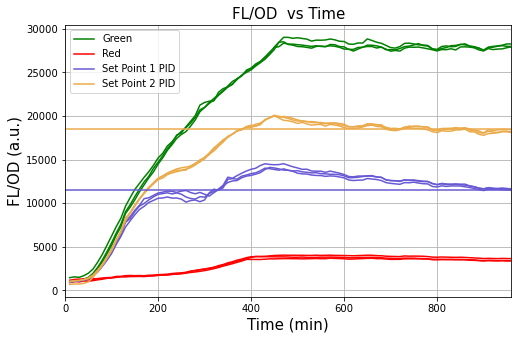

In [8]:
fig, ax = plt.subplots(1,1, figsize = (8,5))

size = 5

# for i in range(len(neg_wells)):
#     # Add label only for the first replicate
#     if i == 0:
#         ax.plot(time, neg_ctrl_FL_by_OD[i, :], '--', color = color_dict['neg_ctrl'], label = 'Negative Control')#, s = size)
#     else:
#         ax.plot(time, neg_ctrl_FL_by_OD[i, :], '--', color=color_dict['neg_ctrl'])#, s = size)

for i in range(len(green_constant)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, green_constant_FL_by_OD[i, :], color = color_dict['green_constant'], label = 'Green')#, s = size)

    else:
        ax.plot(time, green_constant_FL_by_OD[i, :], color = color_dict['green_constant'])#, s = size)

for i in range(len(red_constant)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, red_constant_FL_by_OD[i, :], color = color_dict['red_constant'], label = 'Red')#, s = size)

    else:
        ax.plot(time, red_constant_FL_by_OD[i, :], color = color_dict['red_constant'])#, s = size)

for i in range(len(set_point_1_PI)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, set_point_1_PI_FL_by_OD[i, :], color = color_dict['set_point_1_PI'], label = 'Set Point 1 PID')#, s = size)

    else:
        ax.plot(time, set_point_1_PI_FL_by_OD[i, :], color = color_dict['set_point_1_PI'])#, s = size)

for i in range(len(set_point_2_PI)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, set_point_2_PI_FL_by_OD[i, :], color = color_dict['set_point_2_PI'], label = 'Set Point 2 PID')#, s = size)

    else:
        ax.plot(time, set_point_2_PI_FL_by_OD[i, :], color = color_dict['set_point_2_PI'])#, s = size)

ax.axhline(st_pt_1, xmin = 0, xmax = 1, color = color_dict['set_point_1_PI'])
ax.axhline(st_pt_2, xmin = 0, xmax = 1, color = color_dict['set_point_2_PI'])


ax.legend()
ax.grid(True)
ft = 15
ax.set_ylabel('FL/OD (a.u.)', fontsize = ft)
ax.set_xlabel('Time (min)', fontsize = ft)
ax.set_title('FL/OD  vs Time', fontsize = ft)
ax.set_xlim((0, xlimit))

In [9]:
red_constant_avg = np.mean(red_constant_FL_by_OD, axis = 0)
green_constant_avg = np.mean(green_constant_FL_by_OD, axis = 0)
set_point_1_PI_avg = np.mean(set_point_1_PI_FL_by_OD, axis = 0)
set_point_2_PI_avg = np.mean(set_point_2_PI_FL_by_OD, axis = 0)

red_constant_std_dev = np.std(red_constant_FL_by_OD, axis = 0)
green_constant_std_dev = np.std(green_constant_FL_by_OD, axis = 0)
set_point_1_PI_std_dev = np.std(set_point_1_PI_FL_by_OD, axis = 0)
set_point_2_PI_std_dev = np.std(set_point_2_PI_FL_by_OD, axis = 0)

(0.0, 960.0)

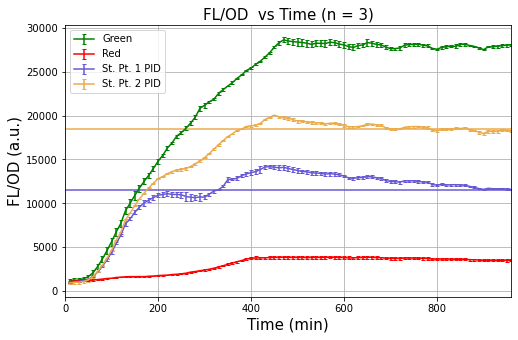

In [10]:
fig, ax = plt.subplots(1,1, figsize = (8,5))

size = 5

ax.errorbar(time, green_constant_avg, yerr = green_constant_std_dev, color = color_dict['green_constant'], label = 'Green', capsize = 2)
ax.errorbar(time, red_constant_avg, yerr = red_constant_std_dev, color = color_dict['red_constant'], label = 'Red', capsize = 2)
ax.errorbar(time, set_point_1_PI_avg, yerr = set_point_1_PI_std_dev, color = color_dict['set_point_1_PI'], label = 'St. Pt. 1 PID', capsize = 2)
ax.errorbar(time, set_point_2_PI_avg, yerr = set_point_2_PI_std_dev, color = color_dict['set_point_2_PI'], label = 'St. Pt. 2 PID', capsize = 2)
     
ax.axhline(st_pt_1, xmin = 0, xmax = 1, color = color_dict['set_point_1_PI'])
ax.axhline(st_pt_2, xmin = 0, xmax = 1, color = color_dict['set_point_2_PI'])


ax.legend()
ax.grid(True)
ft = 15
ax.set_ylabel('FL/OD (a.u.)', fontsize = ft)
ax.set_xlabel('Time (min)', fontsize = ft)
ax.set_title('FL/OD  vs Time (n = 3)', fontsize = ft)
ax.set_xlim((0, xlimit))

In [11]:
# # # ## Export the FL/OD data for modeling work 

# FL_OD_data = dict()

# FL_OD_data['G1'] = green_constant_FL_by_OD[0]
# FL_OD_data['G2'] = green_constant_FL_by_OD[1]
# FL_OD_data['G3'] = green_constant_FL_by_OD[2]

# FL_OD_data['SP2_1'] = set_point_2_PI_FL_by_OD[0]
# FL_OD_data['SP2_2'] = set_point_2_PI_FL_by_OD[1]
# FL_OD_data['SP2_3'] = set_point_2_PI_FL_by_OD[2]

# FL_OD_data['R1'] = red_constant_FL_by_OD[0]
# FL_OD_data['R2'] = red_constant_FL_by_OD[1]
# FL_OD_data['R3'] = red_constant_FL_by_OD[2]

# FL_OD_data['SP1_1'] = set_point_1_PI_FL_by_OD[0]
# FL_OD_data['SP1_2'] = set_point_1_PI_FL_by_OD[1]
# FL_OD_data['SP1_3'] = set_point_1_PI_FL_by_OD[2]

# FL_OD_data['NC'] = neg_ctrl_FL_by_OD[0]

# FL_OD_data['Time'] = time

# FL_OD_df = pd.DataFrame(data = FL_OD_data)
# FL_OD_df.to_csv('FL_OD_run_data_050725.csv')